# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Kunthi Siswati Suryo
- **Email:** dewikunthi6@gmail.com
- **ID Dicoding:** dewikunthisiswati

## Menentukan Pertanyaan Bisnis

- Pada musim apakah rata-rata jumlah penyewaan sepeda tertinggi?
- Bagaimana rata-rata jumlah sewa sepeda di hari libur dan hari kerja?
- Bagaimana pola jumlah sewa sepeda perbulan?

## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime

## Data Wrangling

### Gathering Data

In [9]:
day = pd.read_csv('D:/LaskarAI/laskarai/data/day.csv', delimiter = ';')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# Menghitung jumlah baris dan kolom pada data
print('Jumlah baris :', day.shape[0])
print('Jumlah kolom :', day.shape[1])

Jumlah baris : 731
Jumlah kolom : 16


- Terdapat 731 baris dan 16 kolom pada data.

### Assessing Data

In [11]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


- Tipe data masih belum sesuai, variabel season seharusnya bertipe category.

In [12]:
# Mengubah tipe data
day_df = pd.DataFrame(day)

day_df['season'] = day_df['season'].replace({1: 'Semi', 2: 'Panas', 3:"Gugur", 4:"Dingin"})
day_df['yr'] = day_df['yr'].replace({0: '2011', 1: '2012'})
day_df['mnth']= day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].replace({0: '-', 1: 'Libur'}).astype('category')
day_df['workingday'] = day_df['workingday'].replace({0: 'Weekend', 1: 'Weekday'}).astype('category')
day_df['workingday']= day_df['workingday'].astype('category')
day_df['weekday'] = day_df['weekday'].replace({0: 'Senin', 1: 'Selasa', 2:'Rabu', 3:'Kamis', 4:"Jumat", 5:"Sabtu", 6:"Minggu"})
day_df['weathersit'] = day_df['weathersit'].replace({1: 'Cerah', 2: 'Berkabut', 3:'Salju Ringan', 4:'Hujan Lebat'})
day_df['season']= day_df['season'].astype('category')
day_df['yr']= day_df['yr'].astype('category')
day_df['weekday']= day_df['weekday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     731 non-null    int64   
 1   dteday      731 non-null    object  
 2   season      731 non-null    category
 3   yr          731 non-null    category
 4   mnth        731 non-null    category
 5   holiday     731 non-null    category
 6   weekday     731 non-null    category
 7   workingday  731 non-null    category
 8   weathersit  731 non-null    category
 9   temp        731 non-null    float64 
 10  atemp       731 non-null    float64 
 11  hum         731 non-null    float64 
 12  windspeed   731 non-null    float64 
 13  casual      731 non-null    int64   
 14  registered  731 non-null    int64   
 15  cnt         731 non-null    int64   
dtypes: category(7), float64(4), int64(4), object(1)
memory usage: 58.0+ KB


Tipe data sudah sesuai.

### Cleaning Data

In [13]:
# Pengecekan missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data.

In [14]:
# Pengecekan duplikat data
day_df.duplicated().sum()

np.int64(0)

Tidak terdapat duplikasi pada data.

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,Semi,2011,1,-,Minggu,Weekend,Berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02/01/2011,Semi,2011,1,-,Senin,Weekend,Berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03/01/2011,Semi,2011,1,-,Selasa,Weekday,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04/01/2011,Semi,2011,1,-,Rabu,Weekday,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05/01/2011,Semi,2011,1,-,Kamis,Weekday,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

In [16]:
# Jumlah Total
def total_count(day_df, column) :
    return day_df[column].sum()

print("Total Sepeda yang Disewa =", total_count(day_df, 'cnt'))
print("Total Pengguna Terdaftar =", total_count(day_df, 'registered'))
print("Total Pengguna Biasa =", total_count(day_df, 'casual'))

Total Sepeda yang Disewa = 3292679
Total Pengguna Terdaftar = 2672662
Total Pengguna Biasa = 620017


In [17]:
# Tren penyewa sepeda
trend_bike = day_df.groupby(by = 'yr').agg({
    'cnt':'mean'
})
trend_bike.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\91832296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = day_df.groupby(by = 'yr').agg({


,cnt
yr,
2011,3405.761644
2012,5599.934426


In [18]:
# Pengelompokan penyewa sepeda berdasarkan musim
day_df.groupby('season').agg({
    'casual' : 'mean',
    'registered' : 'mean',
    'cnt' : ['max', 'min', 'mean']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\3598503242.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('season').agg({


casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Dingin   729.112360  3999.050562  8555    22  4728.162921
Gugur   1202.611702  4441.691489  8714  1115  5644.303191
Panas   1106.097826  3886.233696  8362   795  4992.331522
Semi     334.928177  2269.204420  7836   431  2604.132597

Dapat dilihat, bahwa penyewaan sepeda tertinggi terjadi selama musim dingin. Sedangkan penyewaan sepeda terendah terjadi pada musim dingin.

In [19]:
# Pengelompokan penyewa sepeda berdasarkan cuaca
day_df.groupby('weathersit').agg({
    'cnt' : ['max', 'min', 'mean']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\3301295682.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby('weathersit').agg({


cnt                  
               max  min         mean
weathersit                          
Berkabut      8362  605  4035.862348
Cerah         8714  431  4876.786177
Salju Ringan  4639   22  1803.285714

Berdasarkan hasil, dapat dilihat bahwa penyewaan sepeda terbanyak dilakukan saat cuaca cerah.

In [20]:
# Perbandingan Sewa Sepeda Harian
day_df.groupby(by = 'weekday').agg({
    'cnt' : ['max', 'min', 'mean']
})

C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\2630341839.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by = 'weekday').agg({


cnt                   
          max   min         mean
weekday                         
Jumat    7804   431  4667.259615
Kamis    8173   441  4548.538462
Minggu   8714   627  4550.542857
Rabu     7767   683  4510.663462
Sabtu    8362  1167  4690.288462
Selasa   7525    22  4338.123810
Senin    8227   605  4228.828571

Berdasarkan hasil, dapat dilihat bahwa penyewaan sepeda terjadi peningkatan secara konstan antara hari Senin dan Jumat. Dan penyewaan sepeda pada Sabtu dan Minggu mengalami penurunan. Hal ini menandakan bahwa masyarakat lebih sering menyewa sepeda pada weekday/hari kerja dibandingkan pada weekend/hari libur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apakah rata-rata jumlah penyewaan sepeda tertinggi?

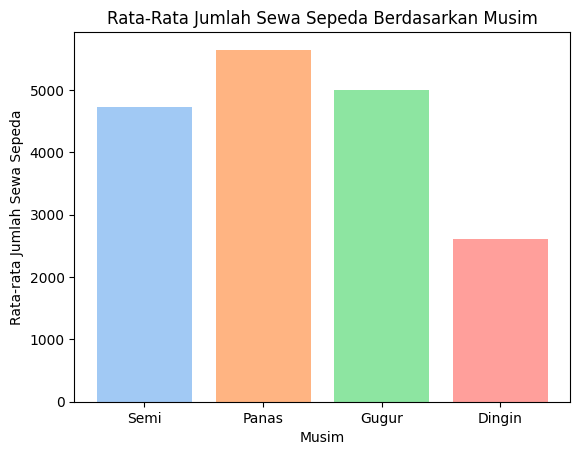

In [21]:
day_season = day_df.groupby('season', observed = False)['cnt'].mean()
season_names = ['Semi', 'Panas', 'Gugur', 'Dingin']

# Membuat visualisasi
sn.set_palette("pastel")
plt.bar(season_names, day_season, color=sn.color_palette())

# Memberikan label sumbu dan judul grafik
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')
plt.title('Rata-Rata Jumlah Sewa Sepeda Berdasarkan Musim')

# Menampilkan grafik
plt.show()

Dapat dilihat pada hasil di atas, data menunjukkan bahwa musim berdampak signifikan terhadap penyewaan sepeda. Musim panas merupakan musim dengan penyewaan sepeda tertinggi, sedangkan musim dingin merupakan musim dengan penyawaan sepeda terendah.

### Pertanyaan 2: Bagaimana rata-rata jumlah sewa sepeda di hari libur dan hari kerja?

C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\2737883959.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  work_data = day_df.groupby('workingday')['cnt'].mean().reset_index()
C:\Users\Asus\AppData\Local\Temp\ipykernel_11780\2737883959.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x='workingday', y='cnt', data=work_data, palette=palette)


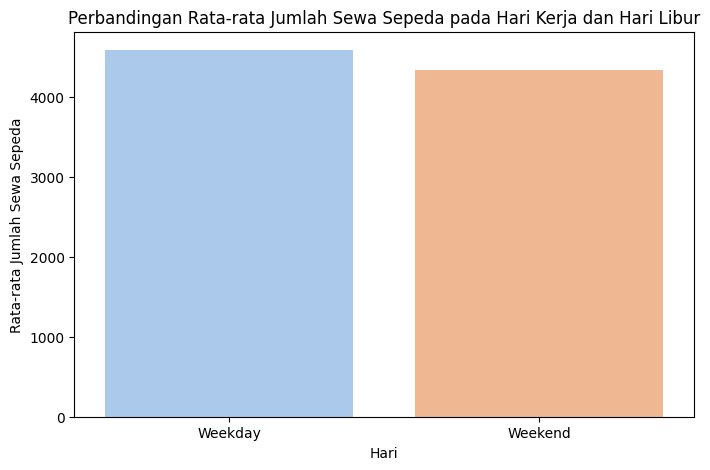

In [22]:
work_data = day_df.groupby('workingday')['cnt'].mean().reset_index()
palette = 'pastel'

plt.figure(figsize=(8, 5))

sn.barplot(x='workingday', y='cnt', data=work_data, palette=palette)

# Menambahkan judul dan label sumbu
plt.title('Perbandingan Rata-rata Jumlah Sewa Sepeda pada Hari Kerja dan Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Jumlah Sewa Sepeda')

# Menampilkan grafik
plt.show()

Grafik menunjukkan bahwa jumlah sewa sepeda pada weekday/hari kerja sedikit lebih banyak dibandingkan dengan weekend/hari libur.

### Pertanyaan 3: Bagaimana pola jumlah sewa sepeda perbulan?

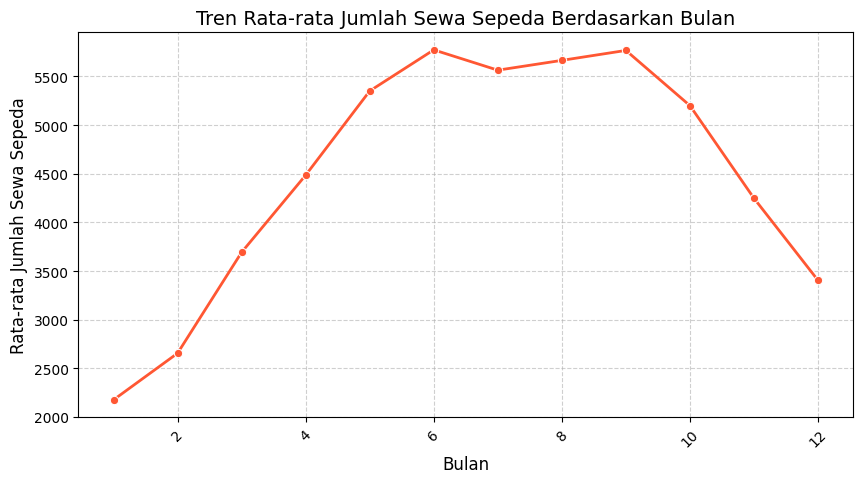

In [23]:
month_data = day_df.groupby('mnth', observed=False)['cnt'].mean().reset_index().sort_values("mnth")

plt.figure(figsize=(10, 5))
sn.lineplot(x='mnth', y='cnt', data=month_data, marker='o', color='#FF5733', linewidth=2)

plt.title('Tren Rata-rata Jumlah Sewa Sepeda Berdasarkan Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata Jumlah Sewa Sepeda', fontsize=12)

plt.xticks(rotation = 45)

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Berdasarkan grafik, jumlah penyewaan sepeda mengalami peningkatan dari bulan 1 (Januari) hingga mencapai puncaknya pada bulan 6 (Juni) hingga 8 (Agustus). Pada bulan 9 (September), jumlah sewa mulai menurun secara bertahap hingga akhir tahun, dengan angka terendah terlihat pada bulan 12 (Desember). Hal ini dapat disimpulkan bahwa faktor musim sangat berpengaruh pada jumlah penyewaan sepeda, di mana puncaknya terlihat pada pertengahan tahun, sedangkan awal dan akhir tahun memiliki angka penyewaan terendah.

## Conclusion

- Conclution pertanyaan 1 : Berdasarkan grafik di atas, dapat disimpulkan bahwa faktor musim memiliki pengaruh yang signifikan terhadap pola penyewaan sepeda. Dimana musim panas menjadi periode dengan jumlah penyewaan tertinggi dan musim dingin menunjukkan jumlah penyewaan terendah. Hal ini dapat terjadi dikarenakan kondisi lingkungan yang mendukung aktivitas luar ruangan.
- Conclution pertanyaan 2 : Dari hasil analisis, dapat disimpulkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan pada hari libur. Hal ini kemungkinan disebabkan oleh penggunaan sepeda sebagai transportasi sehari-hari.
- Conclusion pertanyaan 3 : Pada hasil analisis, dapat disimpulkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh perubahan musim dengan jumlah penyewaan tertinggi terjadi pada pertengahan tahun, khususnya pada bulan Juni hingga Agustus. Sebaliknya, jumlah penyewaan cenderung lebih rendah pada awal dan akhir tahun, terutama pada bulan Desember. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang lebih mendukung aktivitas luar ruangan pada pertengahan tahun.